In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [81]:
df=pd.read_csv("Data Set/2020/heart_2020_cleaned.csv")
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [86]:
df.select_dtypes(include=["int64","float64"])

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,0,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,1,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,12.0,0,0,0


In [87]:
df.replace({"Yes":1,"No":0},inplace=True)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,Male,60-64,Hispanic,1,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,Male,35-39,Hispanic,0,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,Female,45-49,Hispanic,0,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,Female,25-29,Hispanic,0,0,Good,12.0,0,0,0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [68]:
df.select_dtypes(include=["int64","float64"])

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease
0,1,16.60,1,1,1,3.0,30.0,1,1,5.0,1,1
1,0,20.34,0,0,0,0.0,0.0,0,0,7.0,0,0
2,0,26.58,0,0,0,20.0,30.0,0,0,8.0,0,0
3,1,24.21,1,1,1,0.0,0.0,1,1,6.0,1,1
4,0,23.71,0,0,0,28.0,0.0,0,0,8.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
319790,0,27.41,0,0,0,7.0,0.0,0,0,6.0,0,0
319791,0,29.84,0,0,0,0.0,0.0,0,0,5.0,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,6.0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,12.0,0,0


In [69]:
corr_matrix = df.corr()
print(corr_matrix)

                  HeartDisease       BMI   Smoking  AlcoholDrinking    Stroke  \
HeartDisease          1.000000 -0.033644  1.000000         1.000000  1.000000   
BMI                  -0.033644  1.000000 -0.033644        -0.033644 -0.033644   
Smoking               1.000000 -0.033644  1.000000         1.000000  1.000000   
AlcoholDrinking       1.000000 -0.033644  1.000000         1.000000  1.000000   
Stroke                1.000000 -0.033644  1.000000         1.000000  1.000000   
PhysicalHealth        0.041700  0.109788  0.041700         0.041700  0.041700   
MentalHealth         -0.033412  0.064131 -0.033412        -0.033412 -0.033412   
Diabetic              1.000000 -0.033644  1.000000         1.000000  1.000000   
PhysicalActivity      1.000000 -0.033644  1.000000         1.000000  1.000000   
SleepTime             0.041266 -0.051822  0.041266         0.041266  0.041266   
Asthma                1.000000 -0.033644  1.000000         1.000000  1.000000   
KidneyDisease         1.0000

C:\Users\OPJU\AppData\Local\Temp\ipykernel_11472\3083230406.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


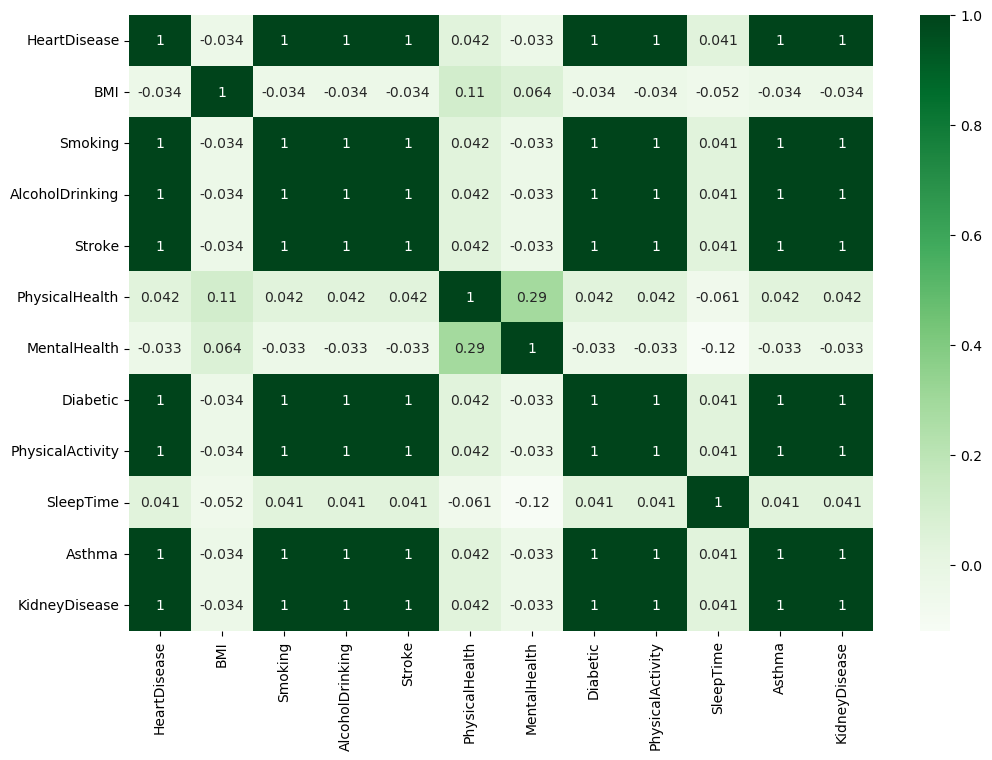

In [70]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap="Greens")

In [71]:
imp_cols=["BMI","PhysicalHealth","MentalHealth","HeartDisease","Smoking","AlcoholDrinking","Stroke","Diabetic","PhysicalActivity","Asthma","KidneyDisease"]
imp_cols

['BMI',
 'PhysicalHealth',
 'MentalHealth',
 'HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'Diabetic',
 'PhysicalActivity',
 'Asthma',
 'KidneyDisease']

In [72]:
training_data=df[imp_cols]
training_data

,BMI,PhysicalHealth,MentalHealth,HeartDisease,Smoking,AlcoholDrinking,Stroke,Diabetic,PhysicalActivity,Asthma,KidneyDisease
0,16.60,3.0,30.0,1,1,1,1,1,1,1,1
1,20.34,0.0,0.0,0,0,0,0,0,0,0,0
2,26.58,20.0,30.0,0,0,0,0,0,0,0,0
3,24.21,0.0,0.0,1,1,1,1,1,1,1,1
4,23.71,28.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,0,0,0,0,0,0,0,0
319791,29.84,0.0,0.0,0,0,0,0,0,0,0,0
319792,24.24,0.0,0.0,0,0,0,0,0,0,0,0
319793,32.81,0.0,0.0,0,0,0,0,0,0,0,0


In [73]:
x=training_data.drop(columns=["Stroke"])
y=training_data["Stroke"]

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3,random_state=50)

In [75]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223856 entries, 177949 to 103904
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               223856 non-null  float64
 1   PhysicalHealth    223856 non-null  float64
 2   MentalHealth      223856 non-null  float64
 3   HeartDisease      223856 non-null  int64  
 4   Smoking           223856 non-null  int64  
 5   AlcoholDrinking   223856 non-null  int64  
 6   Diabetic          223856 non-null  int64  
 7   PhysicalActivity  223856 non-null  int64  
 8   Asthma            223856 non-null  int64  
 9   KidneyDisease     223856 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 18.8 MB


In [76]:
LR=LogisticRegression()

In [77]:
LR.fit(X_train,Y_train)

LogisticRegression()

In [78]:
y_pred=LR.predict(X_test)

In [79]:
list(zip(Y_test,y_pred))

[(1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 

In [80]:
mean_absolute_percentage_error(Y_test,y_pred)

0.0

In [82]:
df.replace("Yes",1)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,1,No,No,3.0,30.0,No,Female,55-59,White,1,1,Very good,5.0,1,No,1
1,No,20.34,No,No,1,0.0,0.0,No,Female,80 or older,White,No,1,Very good,7.0,No,No,No
2,No,26.58,1,No,No,20.0,30.0,No,Male,65-69,White,1,1,Fair,8.0,1,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,1
4,No,23.71,No,No,No,28.0,0.0,1,Female,40-44,White,No,1,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,No,No,7.0,0.0,1,Male,60-64,Hispanic,1,No,Fair,6.0,1,No,No
319791,No,29.84,1,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,1,Very good,5.0,1,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,1,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
